# Project: Investigate a Dataset (TMDb Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I will be analyzing the MDb Movie dataset. This dataset includes information of over 10,000 movie titles that include data such as popularity, budget, revenue, directors, cast, genre runtime, release date, ratings etc.

I will explore the data in order to answer these questions:

##### 1) Who is the most successful director? <br>

##### 2) How has movie production changed over time? What are some trends that we can see?<br>

In [1]:
# Import statements for all of the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Inspect data types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

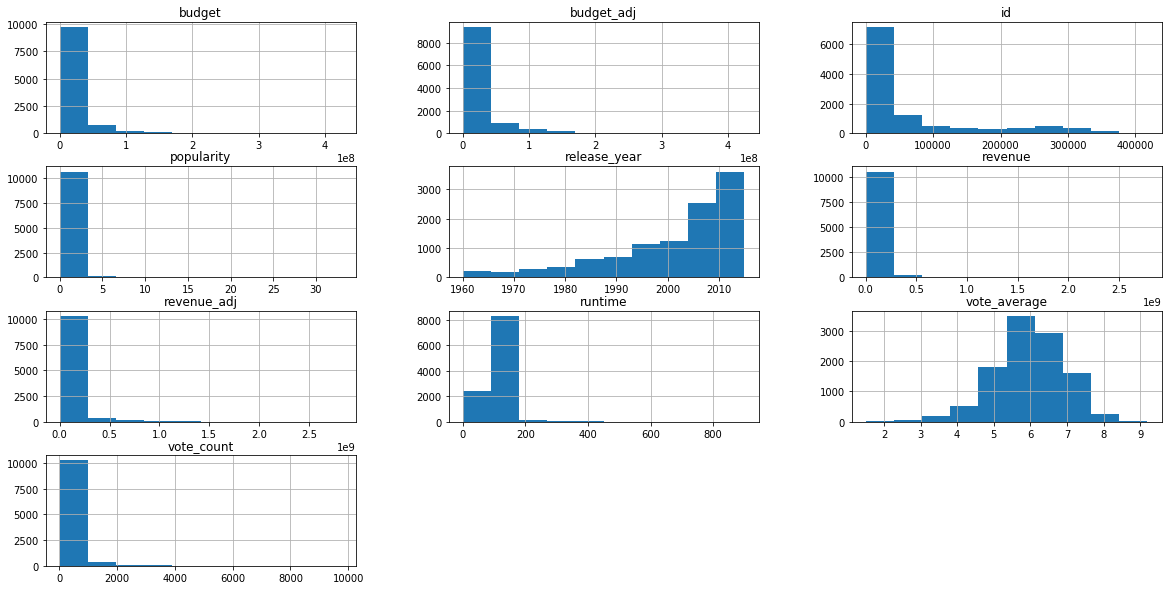

In [4]:
df.hist(figsize = (20,10));

In [5]:
# Checking for duplicate rows
df.duplicated().value_counts()

False    10865
True         1
dtype: int64

In [6]:
# Looking for zero budget rows
df.query('budget == 0').shape

(5696, 21)

In [7]:
# Looking for zero revenue rows
df.query('revenue == 0').shape

(6016, 21)

In [8]:
# Looking for zero runtime rows
df.query('runtime == 0').shape

(31, 21)

The histogram for popularity shows that the data is skewed to the right so I will explore this data further.

In [9]:
# Exploring popularity data
df.popularity

0        32.985763
1        28.419936
2        13.112507
3        11.173104
4         9.335014
5         9.110700
6         8.654359
7         7.667400
8         7.404165
9         6.326804
10        6.200282
11        6.189369
12        6.118847
13        5.984995
14        5.944927
15        5.898400
16        5.749758
17        5.573184
18        5.556818
19        5.476958
20        5.462138
21        5.337064
22        4.907832
23        4.710402
24        4.648046
25        4.566713
26        4.564549
27        4.503789
28        4.062293
29        3.968891
           ...    
10836     0.239435
10837     0.291704
10838     0.151845
10839     0.276133
10840     0.102530
10841     0.264925
10842     0.253437
10843     0.252399
10844     0.236098
10845     0.230873
10846     0.212716
10847     0.034555
10848     0.207257
10849     0.206537
10850     0.202473
10851     0.342791
10852     0.227220
10853     0.163592
10854     0.146402
10855     0.141026
10856     0.140934
10857     0.

In [10]:
# Checking popularity data
df.popularity.describe()

count    10866.000000
mean         0.646441
std          1.000185
min          0.000065
25%          0.207583
50%          0.383856
75%          0.713817
max         32.985763
Name: popularity, dtype: float64

It looks like there are a large number of entries with a popularity <1 so I will explore this further.

In [11]:
# Checking entries with popularity rating <1
df.query('popularity < 1').shape

(9110, 21)

In [12]:
# Checking entries with popularity rating >1
df.query('popularity > 1').shape

(1756, 21)

It seems that the popularity rating is skewed to the right and has an extremely large range of floats with the max of 32.985763 and a min of 0.000065 with a mean of 0.6464. Additionally, 9110 out of 10866 movies have a popularity rating of < 1.

In [13]:
# Checking min for reasonability
df.vote_average.min()

1.5

In [14]:
# Checking max for reasonability
df.vote_average.max()

9.1999999999999993

DATA OBSERVATIONS:

1) There are a total of 10866 rows and total 21 columns.<br> 
2) All the data types for each column seem reasonable for this dataset.<br>
3) Columns: imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies all have null values<br>
4) There is 1 duplicate row<br>
5) There are 5696 rows with 0 budget, 6016 rows with 0 revenue, and there are 31 rows with 0 runtime.<br>
6) release_date is not in proper date format.<br>
7) popularity data is skewed to the right.<br>
8) vote_average has a normal distribution with a min of 1.5 and max of 9.2

### Data Cleaning

I will be taking the below steps in order to clean the data for better analysis:

  1) Remove columns that do not provide relevant information or data for our analysis.
  <br>
  2) Remove duplicate rows.
  <br>
  3) Convert 'release_date' column to date format.
  <br>
  4) Remove rows with 0 budget.
  <br>
  5) Remove rows with 0 revenue.
  <br>
  6) Remove rows with 0 runtime.

In [15]:
# 1) Remove columns that do not provide relevant information or data for our analysis. 

# List of columns that should be dropped because it is irrelevant to the analysis
drop_columns = ['id', 'imdb_id', 'budget_adj', 'revenue_adj', 'cast', 'homepage',  'tagline', 'genres', 'production_companies', 'keywords', 'overview']

# Drop the columns
df.drop(drop_columns, axis = 1, inplace = True)

# Verify new dataset
df.head()

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,4/1/15,2947,7.3,2015


In [16]:
# 2) Remove duplicate rows. 

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Verify there are no more duplicate rows
df.duplicated().value_counts()

False    10865
dtype: int64

In [17]:
# 3) Convert 'release_date' column to date format. 

# Convert data in 'release_date' column to proper date time format
df['release_date'] = pd.to_datetime(df['release_date'])

# Verify datetime format
df.head(1)

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015


In [18]:
# 4) Remove rows with 0 budget.

# Replace all '0' to NAN in budget column
df['budget'] = df['budget'].replace(0, np.NAN)

# Drop rows with budget NaN values
df.dropna(subset = ['budget'], inplace = True)

# Verify there are no more 0 budget rows
df.query('budget == 0').shape

(0, 10)

In [19]:
# 5) Remove rows with 0 revenue.

# Replace all '0' to NAN in revenue column
df['revenue'] = df['revenue'].replace(0, np.NAN)

# Drop rows with revenue NaN values
df.dropna(subset = ['revenue'], inplace = True)

# Verify there are no more 0 revenue rows
df.query('revenue == 0').shape

(0, 10)

In [20]:
# 6) Remove rows with 0 runtime.

# Replace all '0' to NAN in runtime column
df['runtime'] = df['runtime'].replace(0, np.NAN)

# Drop rows with runtime NaN values
df.dropna(subset = ['runtime'], inplace = True)

# Verify there are no more 0 runtime rows
df.query('runtime == 0').shape

(0, 10)

In [21]:
# Checking new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
popularity        3854 non-null float64
budget            3854 non-null float64
revenue           3854 non-null float64
original_title    3854 non-null object
director          3853 non-null object
runtime           3854 non-null int64
release_date      3854 non-null datetime64[ns]
vote_count        3854 non-null int64
vote_average      3854 non-null float64
release_year      3854 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 331.2+ KB


It appears that there an entry in director column that has null values. So I chose to remove that as well.

In [22]:
# Remove null values from cast column.
df.dropna(subset = ['director'], inplace=True)

# Check final dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 10 columns):
popularity        3853 non-null float64
budget            3853 non-null float64
revenue           3853 non-null float64
original_title    3853 non-null object
director          3853 non-null object
runtime           3853 non-null int64
release_date      3853 non-null datetime64[ns]
vote_count        3853 non-null int64
vote_average      3853 non-null float64
release_year      3853 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 331.1+ KB


,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,2015-03-18,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,2015-12-15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,2015-04-01,2947,7.3,2015


We can see from the table above that the final cleaned data set is free from any null values. And that all data types are correct and in the proper format.

<a id='eda'></a>
## Exploratory Data Analysis

## 1) Who is the most successful director?

To explore who is the most successful director I will be analyzing: <br>
1) total revenue <br>
2) total profit <br>
3) average movie rating <br>

### Directors by Revenue

In [23]:
# Creating a table of top 10 directors by revenue
df_rev = df.groupby('director')['revenue'].sum().sort_values(ascending=False)
df_rev = df_rev.reset_index()
top10_rev = df_rev.head(10)
top10_rev

,director,revenue
0,Steven Spielberg,9.018564e+09
1,Peter Jackson,6.523245e+09
2,James Cameron,5.841895e+09
3,Michael Bay,4.917208e+09
4,Christopher Nolan,4.167549e+09
5,David Yates,4.154296e+09
6,Robert Zemeckis,3.869691e+09
7,Chris Columbus,3.725632e+09
8,Tim Burton,3.665415e+09
9,Ridley Scott,3.584431e+09


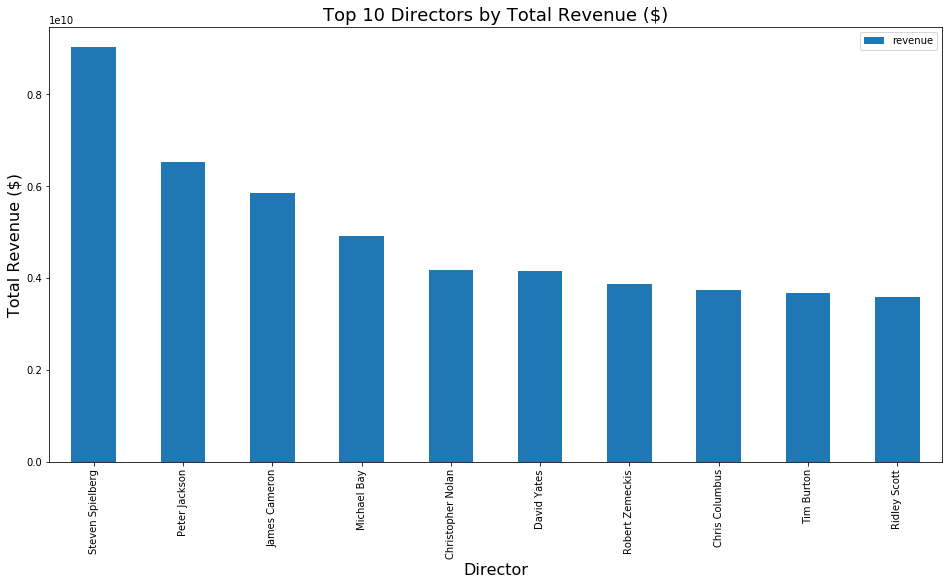

In [24]:
# Creating a bar chart that displays top 10 directos by revenue data

top10_rev.plot.bar(x= 'director', y= ['revenue'], figsize=(16,8))
plt.title('Top 10 Directors by Total Revenue ($)', fontsize = 18)
plt.xlabel('Director', fontsize = 16)
plt.ylabel('Total Revenue ($)', fontsize = 16);

#### Observation:
Here is a bar chart of the top 10 directors by total revenue. We can see that Steven Spielberg has earned the highest amount of revenue for the movies he has directed at over $9 Billion.

### Directors by Profit

In [25]:
# Creating a profit_loss column by subtracting budget from revenue
df['profit_loss'] = df['revenue'] - df['budget']

# Creating a table of top 10 directors by profit
df_profit = df.groupby('director')['profit_loss'].sum().sort_values(ascending=False)
df_profit = df_profit.reset_index()
top10_profit = df_profit.head(10)
top10_profit

,director,profit_loss
0,Steven Spielberg,7.467064e+09
1,Peter Jackson,5.197245e+09
2,James Cameron,5.081995e+09
3,Michael Bay,3.557208e+09
4,David Yates,3.379296e+09
5,Christopher Nolan,3.162549e+09
6,Chris Columbus,3.116632e+09
7,George Lucas,2.955997e+09
8,Robert Zemeckis,2.846691e+09
9,J.J. Abrams,2.839170e+09


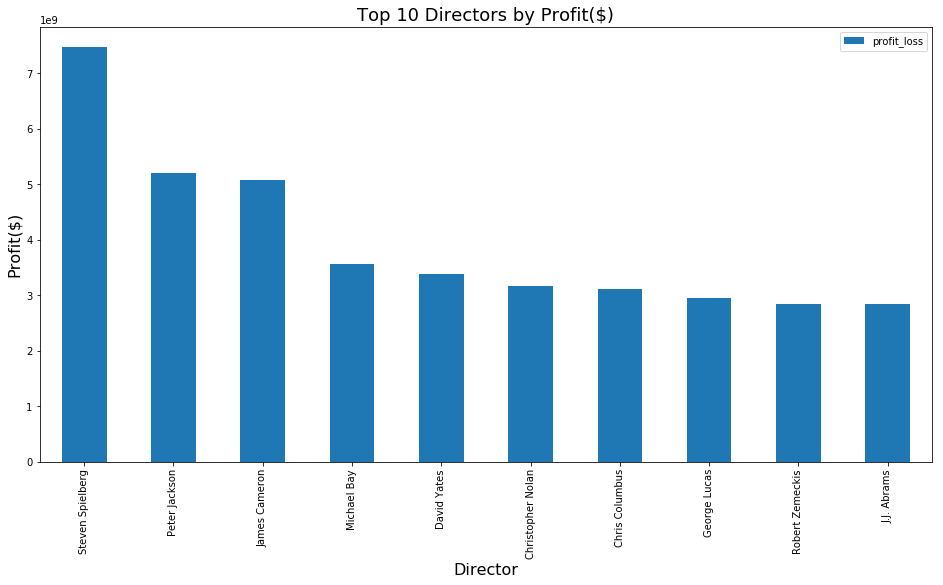

In [26]:
# Creating bar chart to display top 10 directors by profit
top10_profit.plot.bar(x= 'director', y= ['profit_loss'], figsize=(16,8))
plt.title('Top 10 Directors by Profit($)', fontsize = 18)
plt.xlabel('Director', fontsize = 16)
plt.ylabel('Profit($)', fontsize = 16);

#### Observation:

Here is a bar chart of the top 10 directors by total profit. We can see that Steven Spielberg has earned the highest amount of profit for the movies he has directed at over $7 Billion.

### Directors by Movie Rating

Although we have data for popularity rating, the data is skewed very far to the right and I am unsure of the rating scale (true max) and its consistency since the range is from <1 all the way to >32. So I will be analyzing vote_average data as a measure of popularity since that data looks to be cleaner and has a normal distribution. The raw data has a min of 1.5 and max of 9.2, I will assume the scale is a 1-10 scale which is pretty standard. Additionally, I will only be looking at directors that have made at least 3 movies in order to remove any outliers. 

In [27]:
# Making a list of directors who have made more than 3 movies

director_counts = df['director'].value_counts() 
directors_3=(director_counts[director_counts>3])
directors_cons= list(directors_3.index)

df_directors= df[df['director'].isin(directors_cons)]

# Check new dataset
df_directors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1875 entries, 1 to 10848
Data columns (total 11 columns):
popularity        1875 non-null float64
budget            1875 non-null float64
revenue           1875 non-null float64
original_title    1875 non-null object
director          1875 non-null object
runtime           1875 non-null int64
release_date      1875 non-null datetime64[ns]
vote_count        1875 non-null int64
vote_average      1875 non-null float64
release_year      1875 non-null int64
profit_loss       1875 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 175.8+ KB


In [28]:
# Checking vote_average data after cleaning orginal data
df_directors.vote_average.describe()

count    1875.000000
mean        6.295947
std         0.766811
min         3.300000
25%         5.800000
50%         6.300000
75%         6.800000
max         8.400000
Name: vote_average, dtype: float64

Looks like our new dataset has a max of 8.4 and min of 3.3 and a mean of 6.3

In [29]:
# Creating a list of top 10 directors by average of vote_average

df_rating = df_directors.groupby('director')['vote_average'].mean().reset_index()
df_rating = df_rating.sort_values('vote_average', ascending=False)
top10_rating = df_rating.head(10)
top10_rating

,director,vote_average
45,Christopher Nolan,7.637500
214,Quentin Tarantino,7.522222
255,Stanley Kubrick,7.450000
143,Joss Whedon,7.425000
62,David Yates,7.400000
77,Frank Darabont,7.375000
282,Wes Anderson,7.314286
54,David Fincher,7.210000
166,Martin Scorsese,7.200000
9,Alfonso CuarÃ³n,7.150000


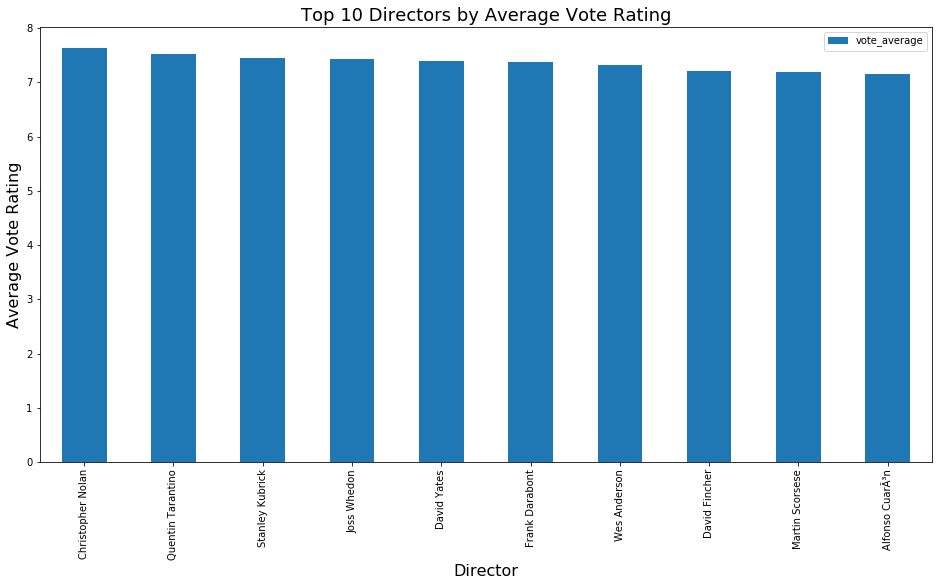

In [30]:
# Creating bar chart to display the top 10 directos by average vote rating
top10_rating.plot.bar(x= 'director', y= ['vote_average'], figsize=(16,8))
plt.title('Top 10 Directors by Average Vote Rating', fontsize = 18)
plt.xlabel('Director', fontsize = 16)
plt.ylabel('Average Vote Rating', fontsize = 16);

#### Observation:

Here is a bar chart of the top 10 directors by average vote rating. We can see that Christopher Nolan has earned the highest amount of average vote rating with an average of 7.6.

### 2) How has movie production changed over time? What are some trends that we can see?

To explore who is the most successful director I will be analyzing: <br>

1) Average movie runtime trend year-to-year <br> 
2) Average movie revenue year-to-year <br>
3) Average movie budget year-to-year <br> 
4) Correlation between revenue and budget <br>
5) Number of movies released per year

### Average Movie Runtime Year-to-Year

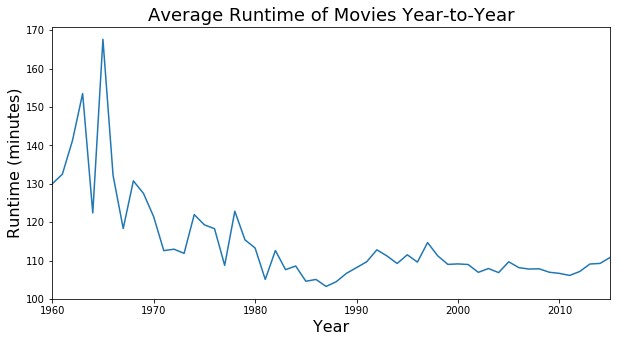

In [31]:
# Grouping average runtime by year
df_runtime = df.groupby('release_year')['runtime'].mean()

# Creating a trend line to show average runtimes from year-to-year

df_runtime.plot(kind='line', figsize = (10, 5))
plt.title('Average Runtime of Movies Year-to-Year', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Runtime (minutes)', fontsize = 16);

#### Oberservation: <br>

The average runtime of movies has decreased with over time. The highest average runtimes were during the 1960s where the max runtime was over 160 minutes. However over time the average runtimes have decreased. The period of lowest average runtimes is between 1985 and 1990. Currently movie runtimes average around 110 minutes.

### Average Revenue Year-to-Year

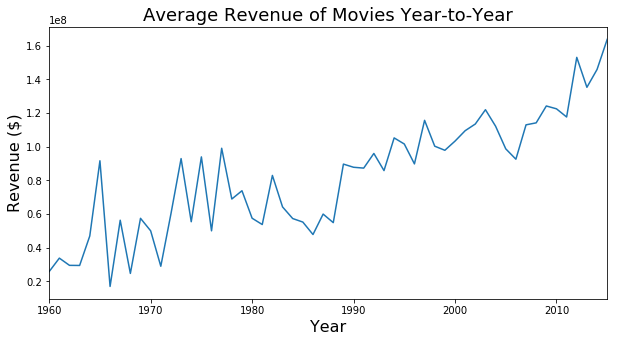

In [32]:
# Grouping average revenue by year

df_rev_trend = df.groupby('release_year')['revenue'].mean()

# Creating a trend line to show average revenue from year-to-year

df_rev_trend.plot(kind='line', figsize = (10, 5))
plt.title('Average Revenue of Movies Year-to-Year', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Revenue ($)', fontsize = 16);

#### Oberservation: <br>

The average revenue of movies has increased with over time roughly about 8x. Now I will take a look at average movie budget to see if there is also an increase in budget over time.

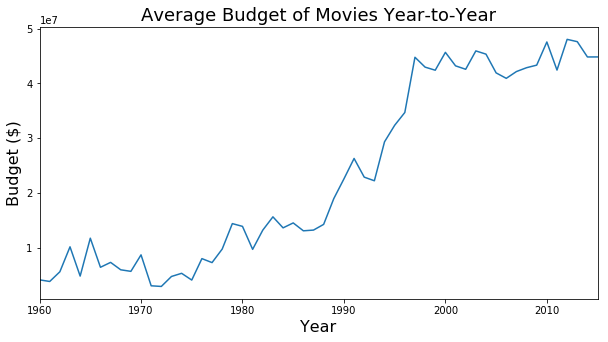

In [33]:
# Grouping average budget by year
df_budget_trend = df.groupby('release_year')['budget'].mean()
 
# Creating a trend line to show average budget from year-to-year

df_budget_trend.plot(kind='line', figsize = (10, 5))
plt.title('Average Budget of Movies Year-to-Year', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Budget ($)', fontsize = 16);

#### Oberservation: <br>

The average budget of movies has increased with over time as well roughly about 5x. Since both the revenue and budgets have increased I will explore this further by looking at a scatter plot to determe if there is a stong correlation between budget and revenue.

### Correlation between revenue and budget

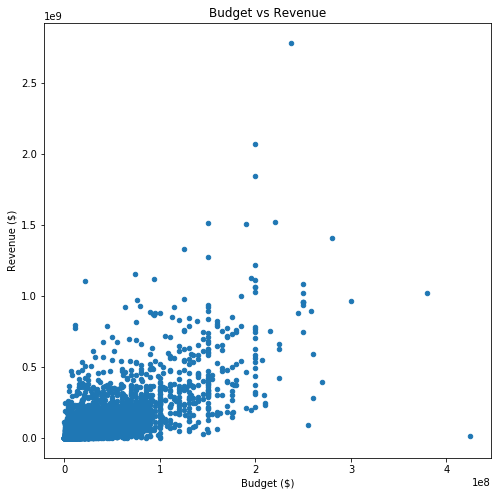

In [34]:
# Creating a scatter plot to determine correlation
df.plot(x='budget',y='revenue',kind='scatter',figsize=(8,8))
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.title('Budget vs Revenue');

#### Oberservation: <br>

Based on the scatter plot above there does not look like there is a strong correlation between budget and revenue as the data points appear to be scattered and concentrated in one area.

In [35]:
# Creating additional column to create a count of movie releases

df['release_count'] = 1

# Checking new column
df.head(1)

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,profit_loss,release_count
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.363529e+09,1


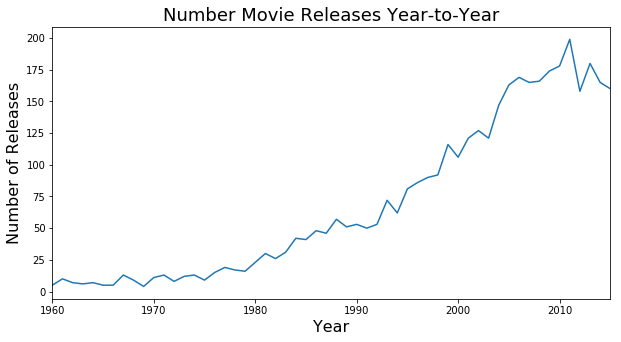

In [36]:
# Creating a new dataset that counts the amount of releases per year
df_rel_cnt = df.groupby('release_year')['release_count'].sum()

# Creating a trend line to show number of movie releases per year

df_rel_cnt.plot(kind='line', figsize = (10, 5))
plt.title('Number Movie Releases Year-to-Year', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Number of Releases', fontsize = 16);

#### Oberservation: <br>

The number of movies released per yer has increased significantly over the years. The increase seem to occure the most between 1980 and 2010 going from about 25 movies per year to about 200 movies per year

<a id='conclusions'></a>
## Conclusions

#### 1) Who is the most successful director? <br>
Based on monetary figures, Steven Spielberg has earned the most revenue and profit for movies that he has directed. However, if we were to look at movie ratings voter average, it appears that Christopher Nolan directs more popular movies based on voter average. One thing to note is that Christophoer Nolan appears on the top 10 directors by revenue (ranked 5th) and al so the top 10 directos by profit (ranked 6th). However Steven Spielberg does not appear on the top 10 directors by movie rating. So I would conclude that Chistopher Nolan has more overall success while Steven Spielberg has more monetary success. <br>

##### Limitations: <br>
1) The only variables used in my analysis to determine Director success are revenue, profit, and average vote rating. I would have also liked to include popularity rating. However, I was not confident in the consistency of the rating system as there were extreme outliers and was not sure of the true max of the rating system. I only included vote average which did not have any outliers and had a normal distribution in my analysis. There are other variables that can contribute to Director success such as movie genre, movie cast, movie budget, etc. <br>

2) When analyzing the raw dataset, I found null values. To explore the dataset further and communicate clear findings, I decided to drop rows with null values in budget, revenue, and runtime columns. One entry was a duplicate so that was dropped also. This decreased the number of entries in the dataset to 3854 vs. the 10866 entries from the raw data. Dropping the null values and duplicate entry removed a majority of the data, so my analysis is only performed on a subset of the original data. <br>

3) When analyzing the dataset for average vote rating, I only chose directors who directed more than 3 movies. I wanted to only include directors who have directed mutiple movies in order to create a better average per director since if a director only directed 1 movie that was highly rated it might skew the data. For this reason the number of entries in the dataset descreased from 3853 to 1875. The vote average analysis is only performed on small subset of the cleaned data used in the revenue and profit analysis. <br>

4) There could be other factors that determine average vote rating besides director, such as cast, visual effects, writers, screenplay writers, editors, etc. <br>

#### 2) How has movie production changed over time? <br>
Over time average movie runtime has decreased and currently averages 110 minutes. Meanwhile average movie budgets and average movie revenues have increased significantly over the past 50 years. Although both have increased over time, the data does not support a strong correlation between budges and revenues. Furthermore, the number of movies that are being released increase significantly over the years creating a highly competetive and saturated market for movies. <br>

##### Limitations: <br>
1) The variables used in my analysis to explore changes in movie production over time are average movie runtime YoY, average movie revenue YoY, average movie budget YoY, number of movies released YoY <br>

2) When analyzing the raw dataset, I found null values. To explore the dataset further and communicate clear findings, I decided to drop rows with null values in budget, revenue, and runtime columns. One entry was a duplicate so that was dropped also. This decreased the number of entries in the dataset to 3854 vs. the 10866 entries from the raw data. Dropping the null values and duplicate entry removed a majority of the data, so my analysis is only performed on a subset of the original data. <br>

3) A limitation of the budget and revenue data is that these figures to not account for inflation so the increase seen in both trends could be less if adjusted for inflation. <br>


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0